https://machinelearningmastery.com/cross-entropy-for-machine-learning/

P=1.000 Q=1.000


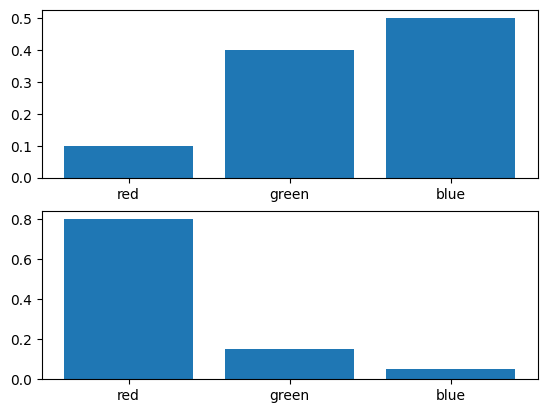

In [1]:
# plot of distributions
from matplotlib import pyplot
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(events, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(events, q)
# show the plot
pyplot.show()

In [3]:
# example of calculating cross entropy
from math import log2
 
# calculate cross entropy
def cross_entropy(p, q):
	return -sum([p[i]*log2(q[i]) for i in range(len(p))])
 
# define data
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate cross entropy H(P, Q)
ce_pq = cross_entropy(p, q)
print('H(P, Q): %.3f bits' % ce_pq)
# calculate cross entropy H(Q, P)
ce_qp = cross_entropy(q, p)
print('H(Q, P): %.3f bits' % ce_qp)

H(P, Q): 3.288 bits
H(Q, P): 2.906 bits


In [4]:
from math import log2
 
# calculate the kl divergence KL(P || Q)
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))
 
# calculate entropy H(P)
def entropy(p):
	return -sum([p[i] * log2(p[i]) for i in range(len(p))])
 
# calculate cross entropy H(P, Q)
def cross_entropy(p, q):
	return entropy(p) + kl_divergence(p, q)
 
# define data
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate H(P)
en_p = entropy(p)
print('H(P): %.3f bits' % en_p)
# calculate kl divergence KL(P || Q)
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate cross entropy H(P, Q)
ce_pq = cross_entropy(p, q)
print('H(P, Q): %.3f bits' % ce_pq)

H(P): 1.361 bits
KL(P || Q): 1.927 bits
H(P, Q): 3.288 bits


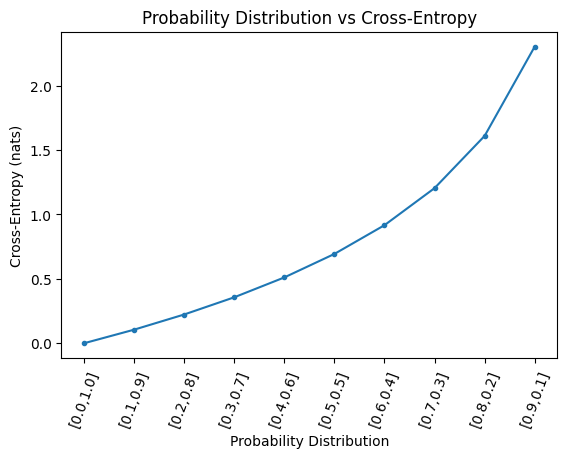

In [5]:
# cross-entropy for predicted probability distribution vs label
from math import log
from matplotlib import pyplot
 
# calculate cross-entropy
def cross_entropy(p, q, ets=1e-15):
	return -sum([p[i]*log(q[i]+ets) for i in range(len(p))])
 
# define the target distribution for two events
target = [0.0, 1.0]
# define probabilities for the first event
probs = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
# create probability distributions for the two events
dists = [[1.0 - p, p] for p in probs]
# calculate cross-entropy for each distribution
ents = [cross_entropy(target, d) for d in dists]
# plot probability distribution vs cross-entropy
pyplot.plot([1-p for p in probs], ents, marker='.')
pyplot.title('Probability Distribution vs Cross-Entropy')
pyplot.xticks([1-p for p in probs], ['[%.1f,%.1f]'%(d[0],d[1]) for d in dists], rotation=70)
pyplot.subplots_adjust(bottom=0.2)
pyplot.xlabel('Probability Distribution')
pyplot.ylabel('Cross-Entropy (nats)')
pyplot.show()